# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
print(users.shape)
print(users.info())
print(users.describe())

(12000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None
         object_id  last_session_creation_time  opted_in_to_mailing_list  \
count  12000.00000                8.823000e+03    

In [4]:
engagement = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
print(engagement.shape)
print(engagement.info())
print(engagement.describe())

(207917, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB
None
                          time_stamp        user_id   visited
count                         207917  207917.000000  207917.0
mean   2013-10-30 05:06:45.648763648    5913.314197       1.0
min              2012-05-31 08:20:06       1.000000       1.0
25%              2013-07-16 20:17:21    3087.000000       1.0
50%              2013-12-03 06:38:34    5682.000000       1.0
75%              2014-03-13 08:00:24    8944.000000       1.0
max              2014-06-06 14:58:50   12000.000000       1.0
std                              NaN    3394.941674       0.0


##### Using this code we can group the user by their user id, and for each user we can find the difference between the first and third login and it if its less than 7 days they are an adopted user so we can add it to set to keep records of only the unique users. The logic for this code took most of my time so I spent less time with modelling.

In [6]:
from datetime import timedelta

adopted_users = set()

for user_id, group in engagement.groupby('user_id'):
    dates = group['time_stamp'].sort_values()
    for i in range(len(dates) - 2):
        if (dates.iloc[i+2] - dates.iloc[i]).days <= 7:
            adopted_users.add(user_id)
            break


### Target Variable 

In [7]:
users['adopted_user'] = users['object_id'].apply(lambda x: 1 if x in adopted_users else 0)

In [8]:
users = users.drop('object_id', axis=1)

In [9]:
users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


adopted_user                  1.000000
last_session_creation_time    0.392369
org_id                        0.066995
opted_in_to_mailing_list      0.008838
enabled_for_marketing_drip    0.006578
invited_by_user_id            0.001185
Name: adopted_user, dtype: float64


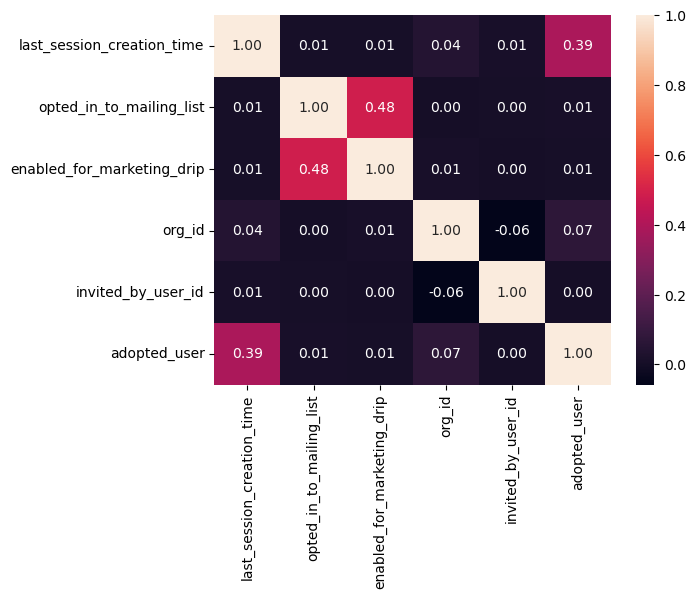

In [10]:
corr = users.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f')
print(corr['adopted_user'].sort_values(ascending=False))

### Visualization: User Signup Source vs Adoption Rate

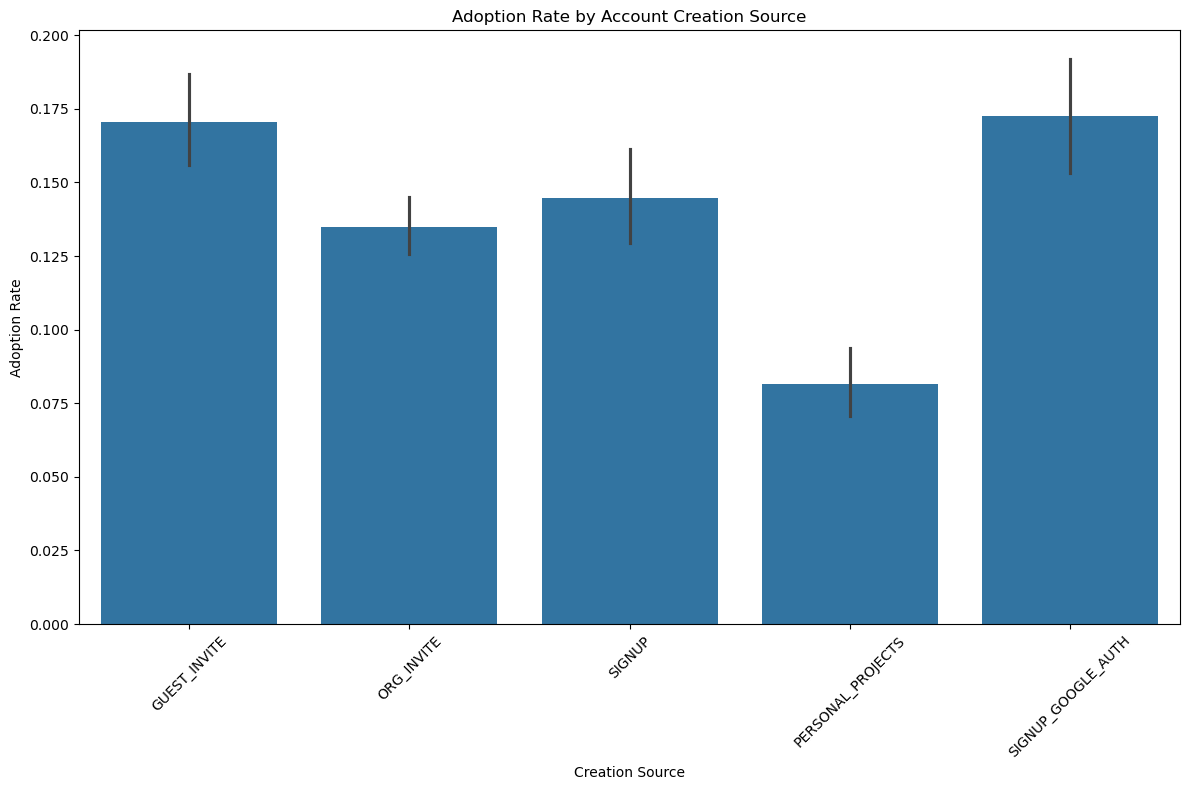

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(data=users, x='creation_source', y='adopted_user', estimator='mean')
plt.title('Adoption Rate by Account Creation Source')
plt.xticks(rotation=45)
plt.ylabel('Adoption Rate')
plt.xlabel('Creation Source')
plt.tight_layout()
plt.show()


##### Users who signed up via Google Authentication or were invited as guests had the highest adoption rates, while those added through personal projects showed the lowest interest. This data visualization indicates that official onboarding methods lead to better long-term engagement.

### Visualization: Last Login Activity Distribution

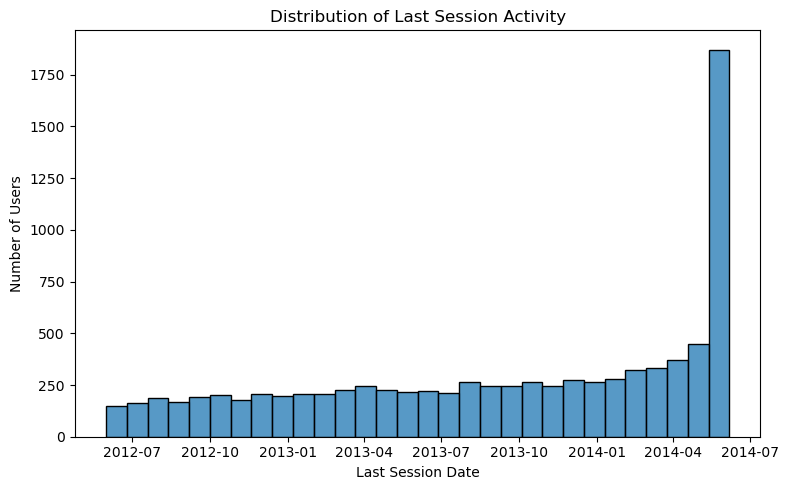

In [21]:
import numpy as np

users['last_session_dt'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

plt.figure(figsize=(8,5))
sns.histplot(users['last_session_dt'].dropna(), bins=30, kde=False)
plt.title('Distribution of Last Session Activity')
plt.xlabel('Last Session Date')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

##### Most users' last activity occurred closer to the data pull date in mid-2014, showing that the platform either recent engagement. Earlier dates show a slow gradual buildup, but the sharp spike shows a strong retention near the end of the timeline.

# Random Forest 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

features = users.drop(columns=['name','email','invited_by_user_id','opted_in_to_mailing_list',
                               'enabled_for_marketing_drip','adopted_user']) # Drop non-numeric columns

features = pd.get_dummies(features, drop_first=True) # Convert categorical variables to dummy/indicator variables
features.fillna(features.mean(), inplace=True) # Fill NaN values with the mean of each column

target = users['adopted_user'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9216666666666666
Recall Score: 0.5915492957746479
Precision Score: 0.7882037533512064
F1 Score: 0.6758620689655173

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      3103
           1       0.79      0.59      0.68       497

    accuracy                           0.92      3600
   macro avg       0.86      0.78      0.82      3600
weighted avg       0.92      0.92      0.92      3600



##### Dropping opted_in_to_mailing_list (corr: 0.018), enabled_for_marketing_drip (corr: 0.006), and invited_by_user_id (corr: 0.001) improved model performance across all four evaluation metrics. These features showed extremely low correlation with the target (adopted_user) and likely introduced noise rather than predictive power. This suggests that they do not provide meaningful linear relationship for predicting user adoption.

# XGBoost Model

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3],                # you can try [3, 5, 7] 
    'learning_rate': [0.01, 0.1],   # you can try [0.01, 0.1, 0.2] 
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1],            # set to 1 unless class imbalance is high
    'use_label_encoder': [False]
}

xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)  # Use 'hist' for faster training on large datasets

# GridSearch
grid_search_xgb = GridSearchCV(xgb_clf, param_grid_xgb, scoring='recall', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Predictions
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# threshold incase we want adjust for a better precision-recall tradeoff
threshold = 0.34
y_pred_thresh = (y_proba_xgb >= threshold).astype(int)

# Evaluate at new threshold
print(f"\nThreshold: {threshold}")

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_thresh):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_thresh):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_thresh):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_thresh):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))

c:\Users\soka\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:15:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Threshold: 0.34

Accuracy: 0.92
Recall: 0.71
Precision: 0.70
F1 Score: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3103
           1       0.70      0.71      0.71       497

    accuracy                           0.92      3600
   macro avg       0.83      0.83      0.83      3600
weighted avg       0.92      0.92      0.92      3600



# Summary of Findings

The goal was to find which users are likely to become adopted users, defined as logging in on three separate days within any 7-day window. We used the user data and engagement logs to find the best features and train using modelling.


### Key EDA Insights


##### Account Creation Source
- Adoption rates varied significantly by signup source. Users invited as Guest_invite or via Google_Auth had the highest adoption rates, while Personal_projects had the lowest. This suggests formal invites or smoother onboarding such as Google login drive better engagement.

##### Last Session Activity
- Most users’ last login date clustered near the end of the data period (mid-2014), showing strong retention near the time of data extraction or possibly reflecting system default behavior.

### Low-Impact Features Removed
- Dropping low-correlation features (opted_in_to_mailing_list, enabled_for_marketing_drip, invited_by_user_id) improved all metrics, indicating these added noise without predictive value.




### Random Forest
    Accuracy: 0.92
    Recall: 0.59
    Precision: 0.79
    F1 Score: 0.68

Strength: High overall accuracy and precision.
Weakness: Lower recall — misses more actual adopters.

### XGBoost (Tuned with Threshold 0.34)

    Accuracy: 0.92
    Recall: 0.71
    Precision: 0.70
    F1 Score: 0.71

Strength: Best balance between recall and precision, indicating stronger ability to identify adopted users while keeping false positives controlled.
Threshold tuning helped optimize precision-recall tradeoff.

##### The XGBoost model, with threshold tuning, outperformed the Random Forest in identifying adopted users. Creation source and recent activity were key signals, while some marketing-related fields added noise. With more behavioral features (e.g., session duration or feature usage), adoption prediction could improve further. More detailed behavior data helps the model find patterns that basic profile info might miss.